# K Means Color Quantization

### Imports


In [71]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [72]:
image_as_array = mpimg.imread('data/palm_trees.jpg')
image_as_array.shape # RGB CODES FOR EACH PIXEL

(1401, 934, 3)

In [73]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

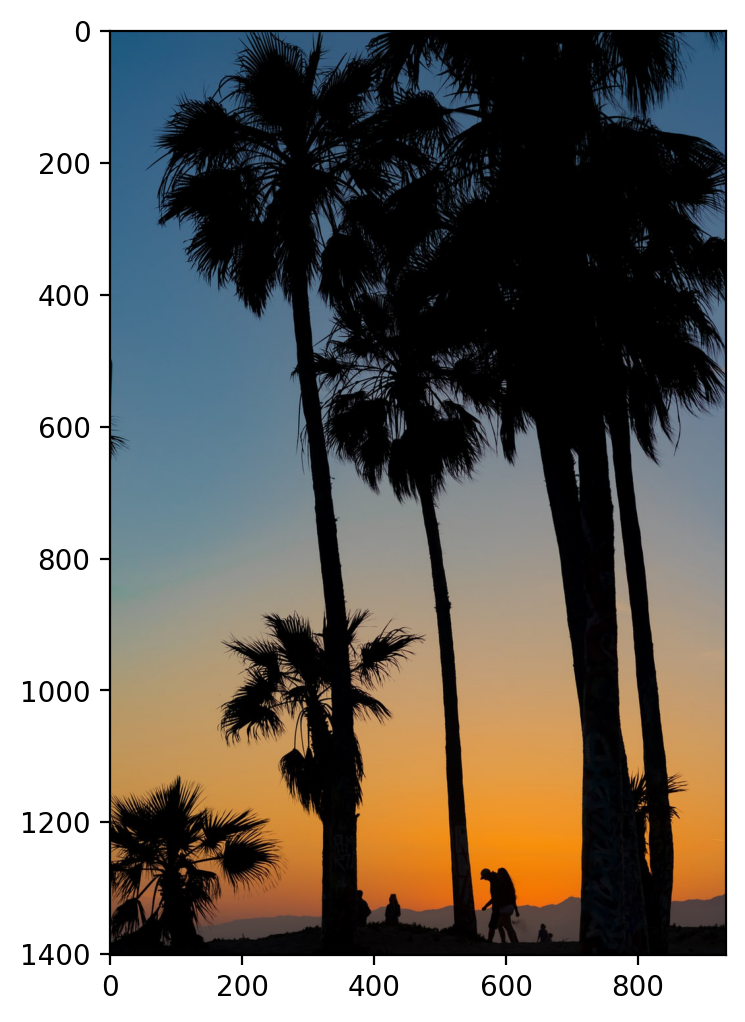

In [74]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [75]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [76]:
(h, w, c) = image_as_array.shape

In [77]:
image_as_array2d = image_as_array.reshape(h*w, c)
image_as_array2d.shape

(1308534, 3)

In [78]:
# Quantizing image for 6 colors
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6)
model

KMeans(n_clusters=6)

In [79]:
# Assiging cluster labels
labels = model.fit_predict(image_as_array2d)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [80]:
type(labels)

numpy.ndarray

In [81]:
# THESE ARE THE 6 RGB COLOR CODES!, centroids for each similar colored pixels.
model.cluster_centers_

array([[ 72.4132677 , 110.23637608, 138.21218275],
       [  2.76048395,   2.57799474,   3.70190289],
       [ 67.16822125,  61.68637979,  62.33278466],
       [141.3038208 , 145.17146503, 142.53807127],
       [196.19059527, 154.52853666, 104.27763662],
       [219.384936  , 133.45645346,  43.6025403 ]])

In [82]:
# RGB Codes should be in integers
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[ 72, 110, 138],
       [  3,   3,   4],
       [ 67,  62,  62],
       [141, 145, 143],
       [196, 155, 104],
       [219, 133,  44]])

In [83]:
# Maps the cluster labels to the rgb_codes
# rshaping it back to 3d so that we can display it as an image object
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [84]:
# quantized each pixel to the centroid (rgb_code) 
# of the cluster it belongs to.
quantized_image

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

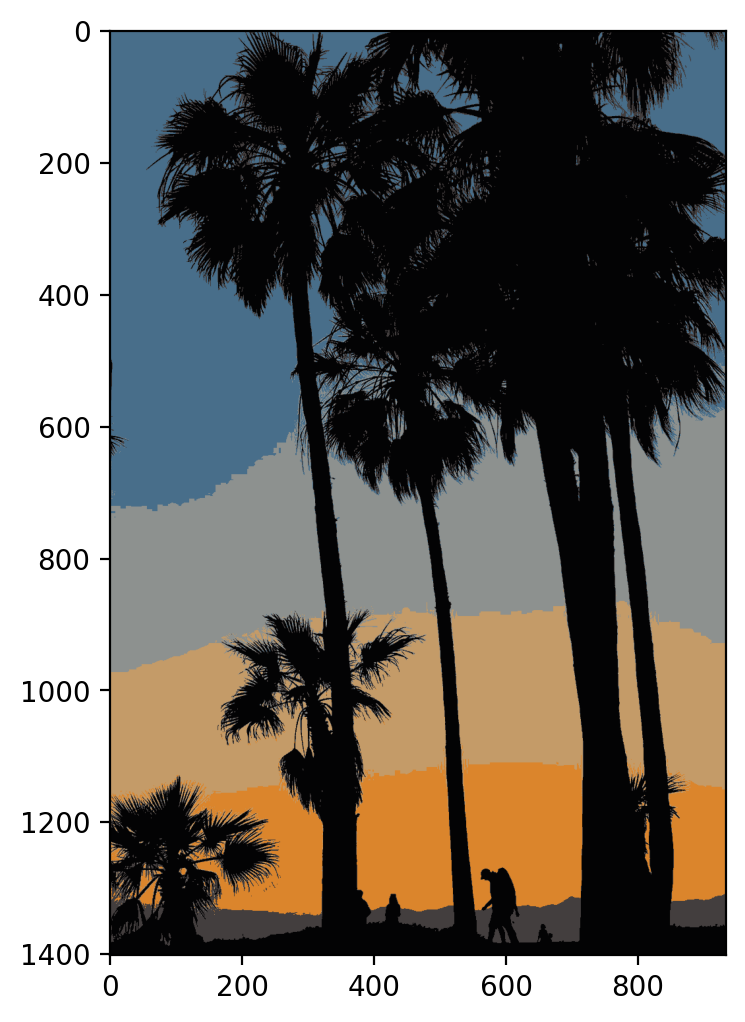

In [85]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow(quantized_image)